In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟函数
def simulate_ecosystem(gender_ratio_variation):
    if gender_ratio_variation == 'equal':
        initial_ratio = 0.5  # 初始雄性比例为 50%
    elif gender_ratio_variation == 'male_dominant':
        initial_ratio = 0.7  # 初始雄性比例为 70%
    elif gender_ratio_variation == 'female_dominant':
        initial_ratio = 0.3  # 初始雄性比例为 30%
    else:
        raise ValueError("Invalid gender ratio variation")

    generations = 50
    gender_ratio = np.zeros(generations)
    gender_ratio[0] = initial_ratio
    predator_population = np.ones(generations)  # 初始捕食者数量为 1
    reproductive_success = np.ones(generations)  # 初始繁殖成功率为 1
    food_resources = np.ones(generations)  # 初始食物资源为 1
    parasite_population = np.ones(generations)  # 初始寄生虫数量为 1
    composite_indicator = np.zeros(generations)  # 初始综合指标为 0
    other_predator_population = np.zeros(generations)  # 初始其他捕食者数量为 0
    prey_population = np.zeros(generations)  # 初始被捕食者数量为 0
    fishery_yield = np.ones(generations)  # 初始渔业产量为 1
    
    
    for gen in range(1, generations):
        gender_ratio[gen] = gender_ratio[gen - 1]
        reproductive_success[gen] = reproductive_success[gen - 1] - 0.005 * abs(gender_ratio[gen] - 0.5)
        predator_population[gen] = predator_population[gen - 1] * reproductive_success[gen]
        food_resources[gen] = food_resources[gen - 1] - 0.02
        # 引入一些波动，模拟寄生虫数量的变化
        parasite_population[gen] = parasite_population[gen - 1] + np.random.normal(loc=0, scale=0.1)
        # 模拟其他捕食者数量的变化，根据七鳃数量和食物资源调整
        other_predator_population[gen] = other_predator_population[gen - 1] + 0.1 * predator_population[gen] - 0.05 * food_resources[gen]
        # 模拟被捕食者数量的变化，根据其他捕食者数量调整
        prey_population[gen] = prey_population[gen - 1] - 0.1 * other_predator_population[gen]
        #模拟渔业产量的变化，根据七鳃鳗数量和食物资源调整
        fishery_yield[gen]= fishery_yield[gen -1]+0.15 *(1 - gender_ratio[gen])* food_resources[gen]
        # 计算综合指标
        composite_indicator[gen] = 0.4 * gender_ratio[gen] + 0.3 * predator_population[gen] + \
                                   0.2 * reproductive_success[gen] + food_resources[gen]

    return composite_indicator, parasite_population, other_predator_population, fishery_yield


In [35]:
def evaluate_population(gender_ratio_variation):
    composite_indicator, parasite_population, other_predator_population, fishery_yield = simulate_ecosystem(
        gender_ratio_variation)

    # 可视化结果
    generations = np.arange(50)
    plt.figure(figsize=(12, 12))

    # 绘制综合指标变化图
    plt.subplot(4, 1, 1)
    plt.plot(generations, composite_indicator, label='Composite Indicator')
    plt.title(f'Composite Indicator Dynamics - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Composite Indicator')
    plt.legend()

    # 绘制寄生虫数量变化图
    plt.subplot(4, 1, 2)
    plt.plot(generations, parasite_population, label='Parasite Population')
    plt.title(f'Parasite Population Dynamics - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Parasite Population')
    plt.legend()

    # 绘制其他捕食者数量变化图
    plt.subplot(4, 1, 3)
    plt.plot(generations, other_predator_population, label='Other Predator Population')
    plt.title(f'Other Predator Population Dynamics - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Other Predator Population')
    plt.legend()

    # 绘制被捕食者数量变化图
    plt.subplot(4, 1, 4)
    plt.plot(generations, fishery_yield, label='Fishery Yield')
    plt.title(f'Fishery Yield - {gender_ratio_variation.capitalize()} Gender Ratio Variation')
    plt.xlabel('Generations')
    plt.ylabel('Prey Population')
    plt.legend()

    plt.tight_layout()
    plt.show()


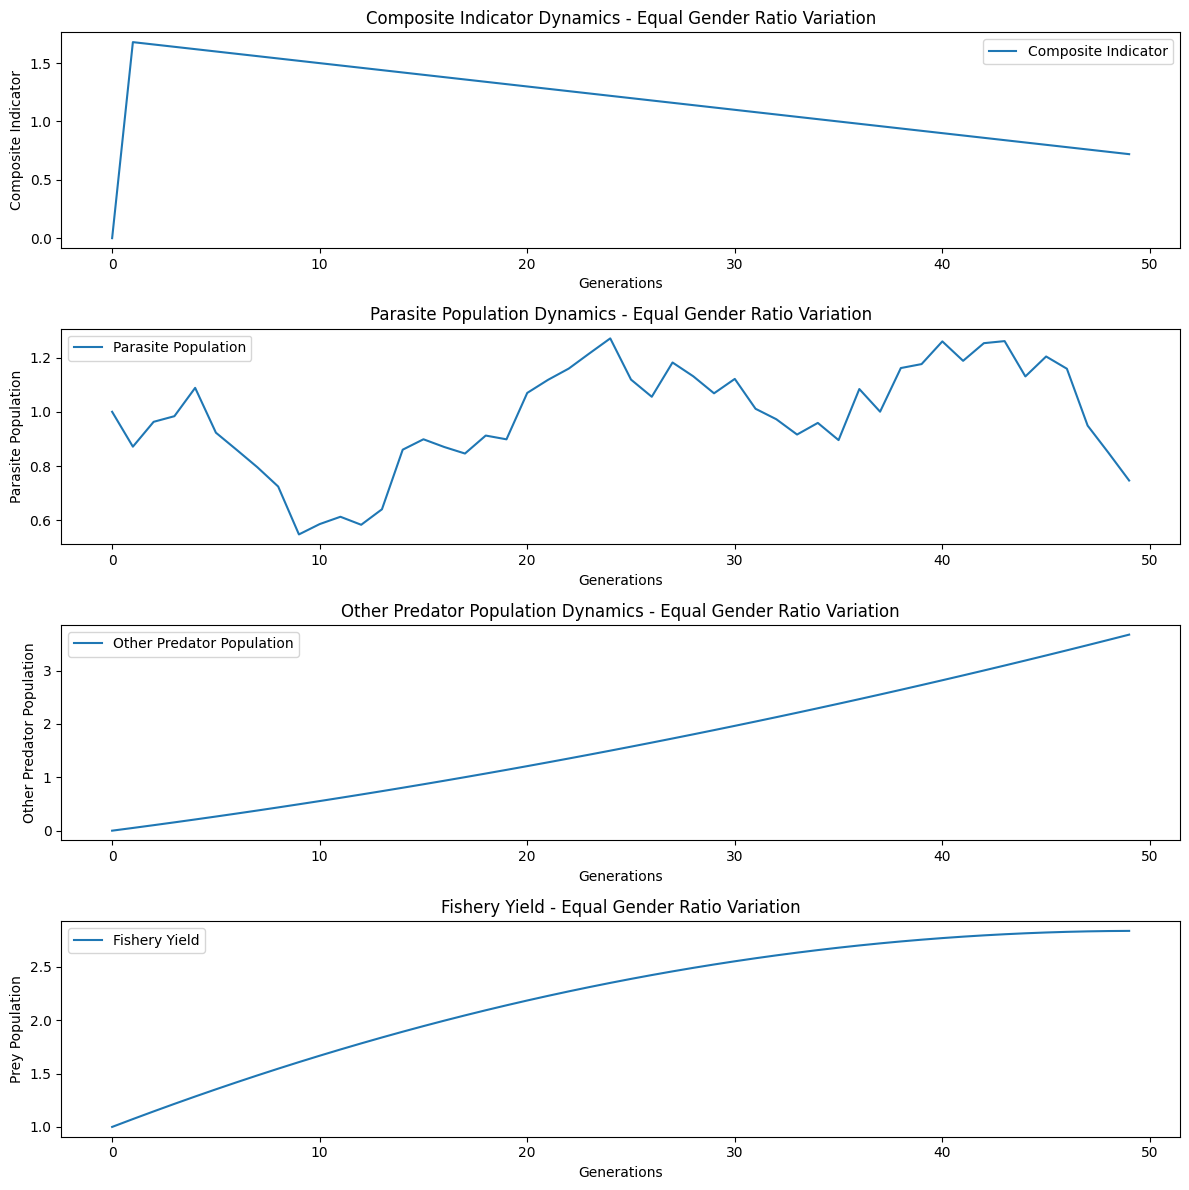

In [36]:
# 模拟性别比例为 1:1 的情况
evaluate_population('equal')

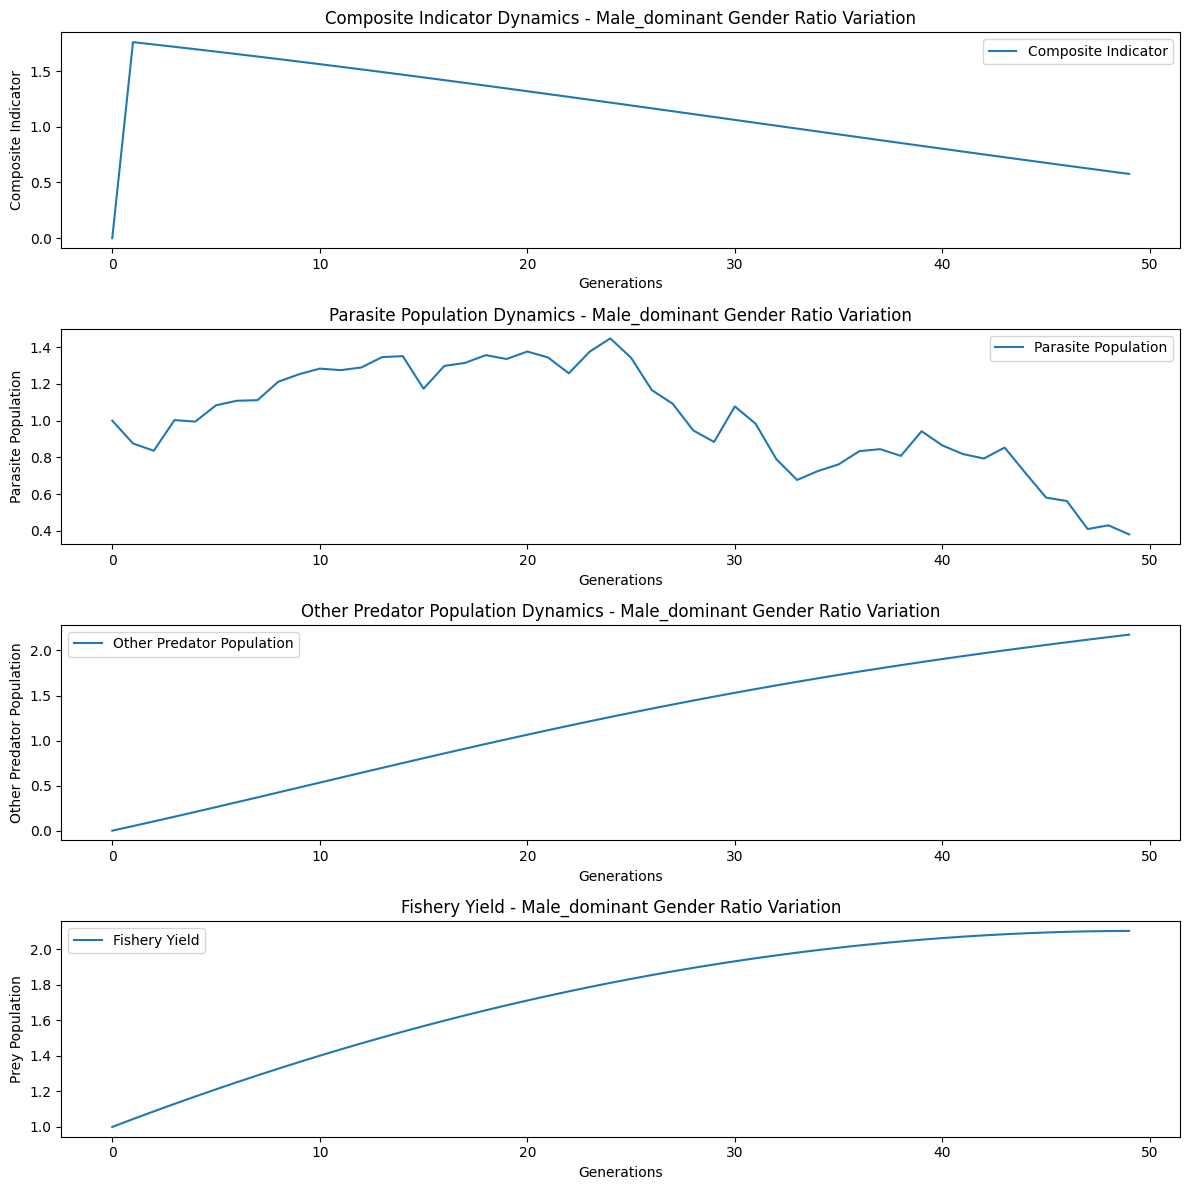

In [37]:
# 模拟性别比例为 70% 雄性的情况
evaluate_population('male_dominant')

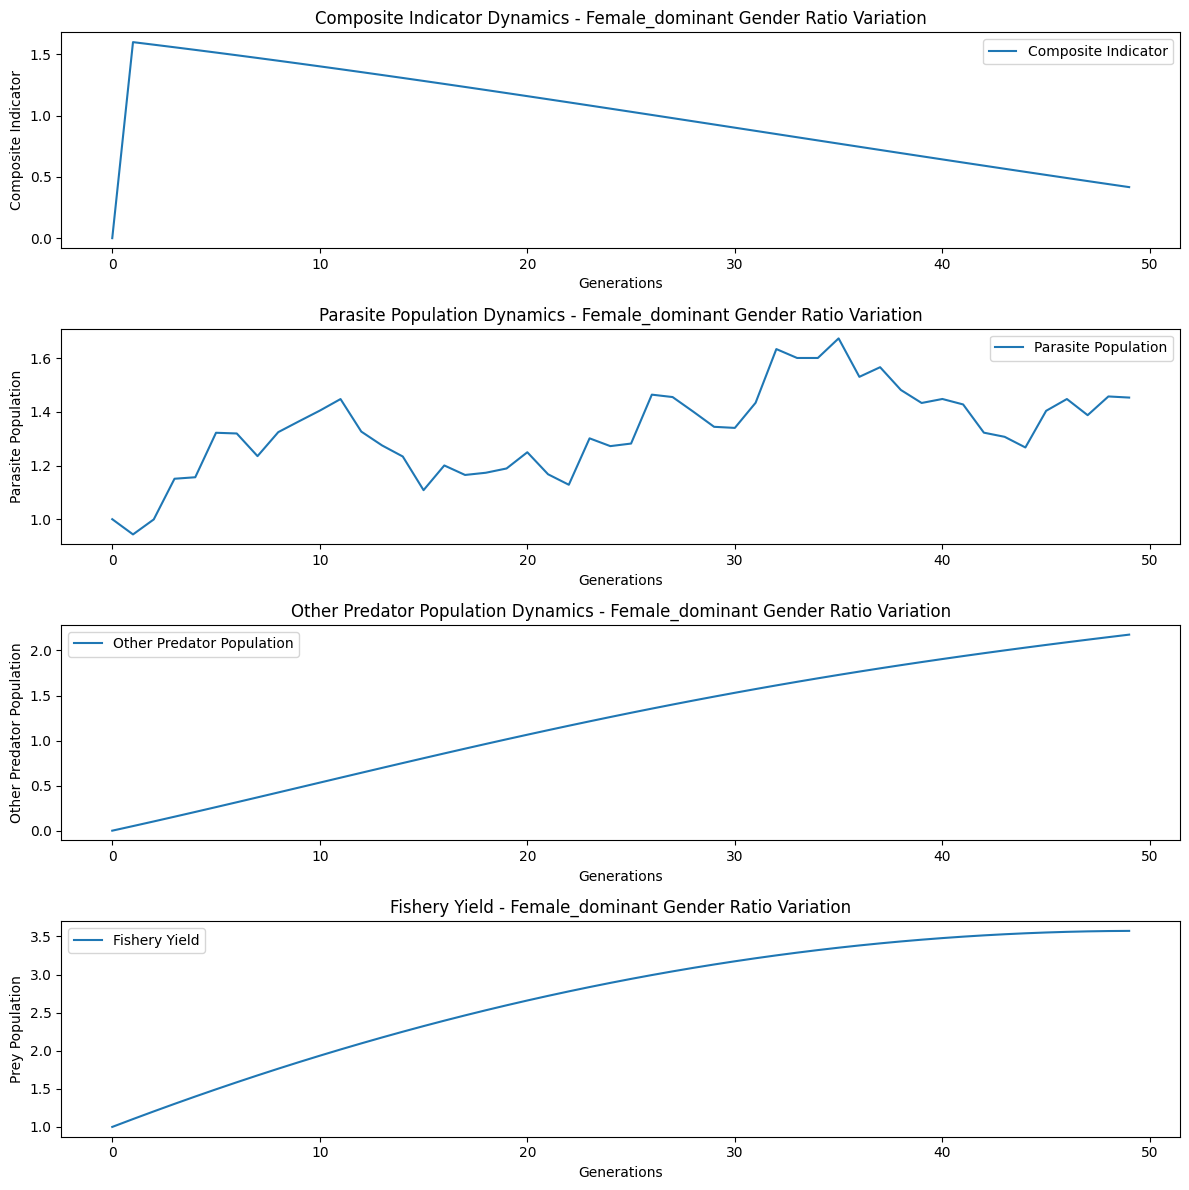

In [38]:
# 模拟性别比例为 30% 雄性的情况
evaluate_population('female_dominant')